In [87]:
%matplotlib inline
#standard imports 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

File available here: http://koza.if.uj.edu.pl/~krzemien/machine_learning2021/materials/datasets/iris_data.csv

In [4]:
input_file = 'iris_data.csv'

In [6]:
data = pd.read_csv(input_file)

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [60]:
dataSetosa=data[data['species']=='Iris-setosa']
dataVersicolor=data[data['species']=='Iris-versicolor']
dataVirginica=data[data['species']=='Iris-virginica']
datasets =[dataSetosa,dataVersicolor,dataVirginica]

In [76]:
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [77]:
data.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


In [63]:
def plotDatasets(datasets, dataSetsLabels, columnsToPlot=None, xLabel='x', yLabel='y', ):
  """
    Args:
      columnsToPlot(list): list of numbers corresponding to columns that should be plotted.
                           e.g. if we want to plot 3rd column  vs 4th column columnsToPlot should be
                           a list [2,3]. By default it is 1rst vs 2nd so [0,1]

  """
  colors = ['red','green','blue'] 
  if not columnsToPlot:
    columnsToPlot = [0, 1]
  for d, dlabel, color in zip(datasets, dataSetsLabels, colors):
    xdata = d.iloc[:, columnsToPlot[0]]
    ydata = d.iloc[:, columnsToPlot[1]]
    plt.scatter(xdata, ydata, label=dlabel, color = color)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
  plt.legend()
  plt.show()
  # plt.savefig('plot.png') #save figure to file

In [65]:
dLabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

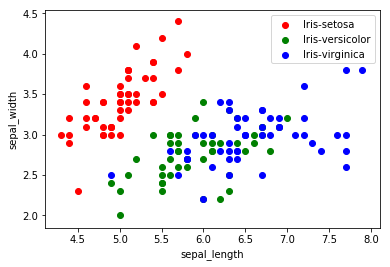

In [66]:
plotDatasets(datasets, dLabels, [0, 1], 'sepal_length', 'sepal_width')

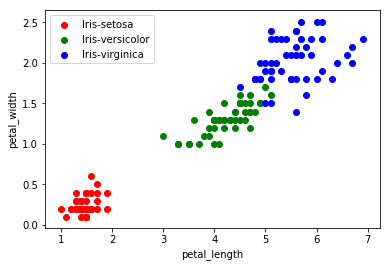

In [67]:
plotDatasets(datasets, dLabels, [2, 3], 'petal_length', 'petal_width')

In [94]:
def distance(x,y):
    return -1

In [163]:
from operator import itemgetter

def getNeighbours(x, Xtrain, Ytrain, metric=distance):
  """
    Function should return neighbours of x, sorted by distance from x. 
    Xtrain and Ytrain form the training set e.g. Xtrain= [[0,1], [10,10]] Y=[0,1]
    can be interpreted in the following way: we have two points in the feature space: [0,1] and [10,10]
    First point belongs to the class 0 and the second to the class 1.

    In order to sort your results by distance one can use sorted construct.
    E.g. if we have a list of elements each of elements being the list with 2 elements, then we can sort the main list using e.g. the second element of every object:
    testList =[[0,1], [3,0], [2,-1]]   
    resultList = sorted(testList, key = itemgetter(1))  # 1 means second element of every 
    object on the list
    We will end up with: [[2,-1], [3,0], [0,1]]

    Args: 
      x(list): list of features(numbers) which represents a point in the feature space with respect to which we calculate the distance.
      Xtrain(list): of feature vectors which form our training sample e.g. [[0,1], [10,10]] -> two points [0,1] and [10,10] with two features each
      Ytrain(list): of class labels which assing given feature vector (point) to given class e.g. [0,1] the first point belongs to class 0 and the second to 1
      metric(function): that calculates distance between two points from the feature space.
  """
  return (-1, [0, 0], 0)

In [164]:
def getKNNeighbours(neighbours, k):
  """
    Function should return k nearest neighbours assuming that neighbours are already sorted by distance.

    Args:
      neighbours(list): neighbours sorted by distance e.g. [[1, [2,0],1],  [5, [2,0],1]],
                        where [5,[2,0],1] -> distance 5, closest feature point [2,0] which belongs to the class 1
      k(integer): number of neighbours to return
    Returns:
      list of k nearest neighbours assuming that neighbours are already sorted by distance.
  """
  return [-1, [0, 0], 0]


In [177]:
def majorityVote(neighbours):
  """
    Args:
      neighbours(list): neighbours sorted by distance e.g. [[1, [2,0],1],  [5, [2,0],1]],
                        where [5,[2,0],1] -> distance 5, closest feature point [2,0] which belongs to the class 1
    Returns:
      number: being the average of class labels  
  """
  return -1.

In [178]:
def predict(x, Xtrain, Ytrain, k):
  """
    Args:
      x(list): feature point that should be classify
      Xtrain(list): of feature vectors which form our training sample e.g. [[0,1], [10,10]] -> two points [0,1] and [10,10] with two features each
      Ytrain(list): of class labels which assing given feature vector (point) to given class e.g. [0,1] the first point belongs to class 0 and the second to 1
    Returns:
     int:  prediction
  """
  return -1


def predictList(xObjects, Xtrain, Ytrain, k):
  """
    Args:
      xObjects(list): list of feature points that should be classify e.g. [[1,0], [2,2]] -> two points with 2 feature each
      Xtrain(list): of feature vectors which form our training sample e.g. [[0,1], [10,10]] -> two points [0,1] and [10,10] with two features each
      Ytrain(list): of class labels which assing given feature vector (point) to given class e.g. [0,1] the first point belongs to class 0 and the second to 1
    Returns:
     list:  list of int corresponding to predictions
  """
  fakePredictions = [0] * len(xObjects)
  return fakePredictions

In [187]:
def meanSquaredError(v, w):
  """
    Args:
      v(list): list of numbers
      w(list): list of numbers
    Returns:
     float: mean squared error
  """
  return -1.

In [188]:
def plotErrors(x, train,valid):
  plt.plot(x, train, label='training error')
  plt.plot(x, valid, label='test error')
  plt.xlabel('k')
  plt.legend()
  plt.show()
  #plt.savefig('errors.png') #save figure to file

In [189]:
def divideData(dataSet, fraction):
  nbTotal = len(ddataSet.index)
  nbTrain = int(nbTotal*fraction)
  return (dataSet.iloc[:nbTrain,:], dataSet.iloc[nbTrain:,:])

In [179]:
def runTests():
  # some tests of distance function
  np.testing.assert_almost_equal(distance([1, 1], [1, 1]), 0)
  np.testing.assert_almost_equal(distance([2, 0, 1], [5, 0, 1]), 3)
  np.testing.assert_almost_equal(distance([0, 0], [2, 2]), np.sqrt(8))

  # some tests of getNeighbours function
  Xtrain = [[2, 0], [0, 0],  [1, 0]]
  Ytrain = [1, 0, 1]
  x = [-1, 0]  # with respect to x we calculate the distance
  result = getNeighbours(x, Xtrain, Ytrain)
  expected = ((1, [0, 0], 0), (2, [1, 0], 1), (3, [2, 0], 1))
  np.testing.assert_equal(result, expected)

  # some tests of getKNNeighbours function
  data = [[1, [0, 0], 0], [2, [1, 0], 1], [3, [2, 0], 1]]
  np.testing.assert_equal(getKNNeighbours(data,  k=1), [[1, [0, 0], 0]])
  np.testing.assert_equal(getKNNeighbours(data,  k=2), [
                          [1, [0, 0], 0], [2, [1, 0], 1]])

  # some tests of majorityVote function
  data = [[1, [0, 0], 0], [2, [1, 0], 1], [3, [2, 0], 1]]
  np.testing.assert_equal(majorityVote(data), 2./3.)

  # some tests of predict function
  xTrain = [[0, 0], [1, 0], [2, 0]]
  yTrain = [0, 1, 1]
  x = [-1, 0]
  k = 1
  np.testing.assert_almost_equal(predict(x, xTrain, yTrain, k), 0)
  k = 2
  np.testing.assert_almost_equal(predict(x, xTrain, yTrain, k), 1)
  k = 3
  np.testing.assert_almost_equal(predict(x, xTrain, yTrain, k), 1)

  # some tests of predictList function
  xTrain = [[0, 0], [1, 0], [2, 0]]
  yTrain = [0, 1, 1]
  xToClassify = [[-1, 0], [3, 0]]
  k = 1
  np.testing.assert_almost_equal(predictList(xToClassify, xTrain, yTrain, k), [0., 1.])

In [180]:
runTests()

In [185]:
class kNN(object):
    def __init__(self, n_neighbours):
        self.n_neighbours = n_neighbours
        self.Xtrain = []
        self.Ytrain = []
    def fit(self, x,y):
        self.Xtrain = x
        self.Ytrain = y
    def predict(self, Xobjects):
        return predictList(Xobjects,self.Xtrain, self.Ytrain, self.n_neighbours)

In [186]:
xTrain = [[0, 0], [1, 0], [2, 0]]
yTrain = [0, 1, 1]
xToClassify = [[-1, 0], [3, 0]]
k = 1
model = kNN(k)
model.fit(xTrain,yTrain)
np.testing.assert_almost_equal(model.predict(xToClassify), [0., 1.])

In [ ]:
classLabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
columnLabels = ['sepal_length', 'sepal_width',
                  'petal_length', 'petal_width', 'species']
# First let's try  Iris-setosa vs Iris-versicolor, two features sepal-length vs sepal-width
# we get rid of the third class Iris-viriginica
dataWithoutVirignica = data[data['species'] != 'Iris-virginica']

def toNumeric(row):
    if row.species == 'Iris-versicolor':
        return 0
    else:
        return 1

dataWithoutVirignica['class']=dataWithoutVirignica.apply(lambda row:toNumeric(row),axis=1)
  
# we leave only sepal_length, sepal_width and class label columns
columnsToLeave=['sepal_length', 'sepal_width', 'class']  
dataSepal = dataWithoutVirignica[columnsToLeave]  

In [ ]:
fraction = 0.8
# we  divide the content into the training and validation set
# we also randomly shuffle the content
trainingSet=dataSepal.sample(frac=fraction)
validationSet=dataSepal.drop(trainingSet.index)
xTrain = trainingSet.iloc[:, 1:].values.tolist()
yTrain = trainingSet.iloc[:, 0].values.tolist()
xValid = validationSet.iloc[:, 1:].values.tolist()
yValid = validationSet.iloc[:, 0].values.tolist()

In [ ]:
if fraction < 1:
    #we calculate training error and validation error
    trainError=[]
    validError=[]
    kRange =range(1,80)
    trainPredictions = predictList(xTrain, xTrain, yTrain, 1)
    for k in kRange:
      trainPredictions = predictList(xTrain, xTrain, yTrain, k)
      validationPredictions = predictList(xValid, xTrain, yTrain, k)
      trainError.append(meanSquaredError(trainPredictions,yTrain))
      validError.append(meanSquaredError(validationPredictions,yValid)) 

In [ ]:
plotErrors(kRange, trainError,validError)